In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the cleaned and prepared dataset
df = pd.read_csv('/workspaces/Data-Analyst-Project-Portfolio/Customer_Churn_Analysis/data/Processed/cleaned_telco_data.csv')

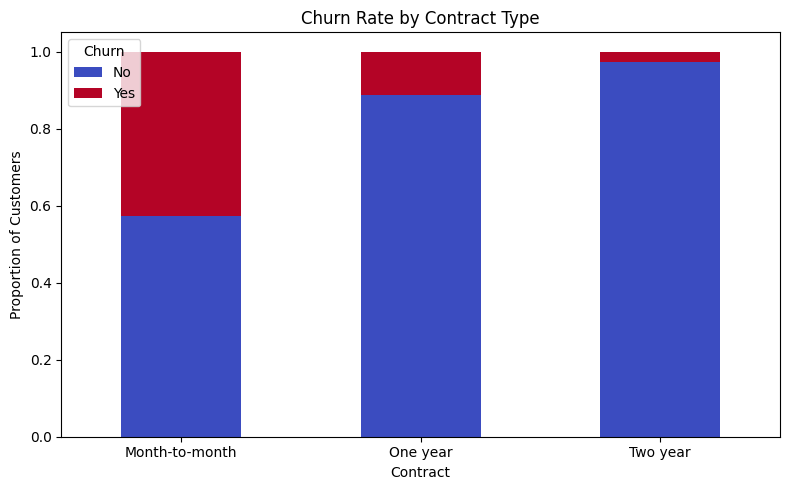

In [3]:
# Churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [4]:
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['TechSupport'] == 'No') &
    (df['tenure'] <= 12)
]

print("High-risk customer count:", high_risk.shape[0])
print("Churn rate in high-risk segment: {:.2f}%".format(high_risk['Churn'].value_counts(normalize=True).get('Yes', 0)*100))

High-risk customer count: 1363
Churn rate in high-risk segment: 61.04%


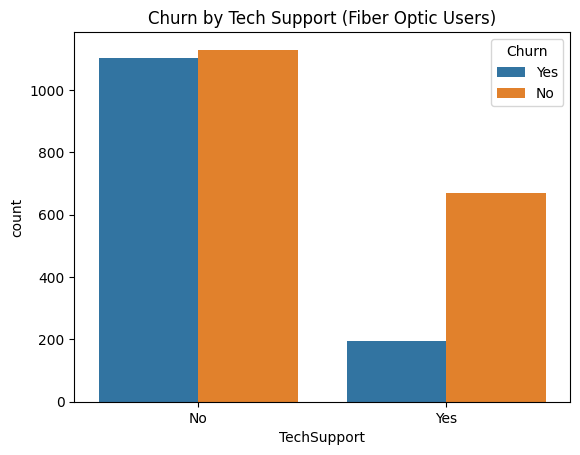

In [5]:
# Target segment (Fiber, No tech support)
sns.countplot(data=df[(df['InternetService'] == 'Fiber optic')], x='TechSupport', hue='Churn')
plt.title("Churn by Tech Support (Fiber Optic Users)")
plt.show()